## Week 6: Dimensionality Reduction (PCA) and Model Validation

**(1a) Load the data file 'data1.csv' and visualize the data using a scatter plot.**

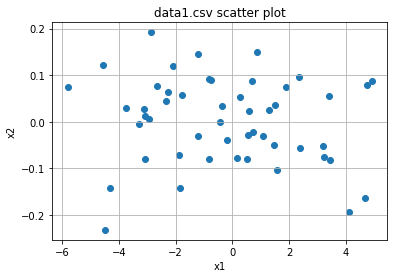

In [78]:
# Write Code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data1 = np.loadtxt('data1.csv',delimiter=',')
plt.scatter(data1[:,0],data1[:,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('data1.csv scatter plot')
plt.grid()
plt.show()

**Let $\bar{x} = (x_1, x_2, x_3, \cdots, x_m)$ denote a data point with $m$ features. Suppose we approximate $\bar{x}$ with fewer features, say two features $x_1$ and $x_2$, as $\bar{y} = (x_1, x_2, 0, \cdots, 0)$. Now, define the loss due to the representation as $\lVert \bar{x} - \bar{y} \rVert^2 = x_3^2 + \cdots + x_m^2$. **

**(1b) Find a single feature representation of the data (in data1.csv) such that the loss in representation is minimum.**

In [79]:
# Write Code here

data1_1dim_x1 = np.zeros(data1.shape)
data1_1dim_x1[:,0] = data1[:,0]

data1_1dim_x2 = np.zeros(data1.shape)
data1_1dim_x2[:,1] = data1[:,1]

loss_data1_1dim_x1 = np.sum( (data1 - data1_1dim_x1)**2 )
loss_data1_1dim_x2 = np.sum( (data1 - data1_1dim_x2)**2 )

print('Loss when the 1 dimension representation is x1 =',loss_data1_1dim_x1)
print('Loss when the 1 dimension representation is x2 =',loss_data1_1dim_x2)
print('Hence, choosing 1 dimensional representation with x1 as the variable minimizes loss')

Loss when the 1 dimension representation is x1 = 0.4191265524458239
Loss when the 1 dimension representation is x2 = 358.10350642415875
Hence, choosing 1 dimensional representation with x1 as the variable minimizes loss


**(1c) Visualize the approximated data and compare it with the original data using scatter plot**

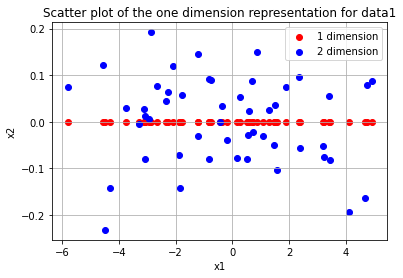

In [80]:
# Write Code here
plt.scatter(data1_1dim_x1[:,0],data1_1dim_x1[:,1],c='r',label='1 dimension')
plt.scatter(data1[:,0],data1[:,1],c='b',label='2 dimension')
plt.legend()
plt.grid()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter plot of the one dimension representation for data1')
plt.show()

**(2a) Load the data file 'data2.csv'.**

In [81]:
# Write Code here

data2 = np.loadtxt('data2.csv',delimiter=',')
print(data2.shape)

(1000, 4)


**(2c) Plot the minimum representation loss as a function of the number of features used for representation. Vary the number of features from 0 to 3**

**(2c) Order the features in decreasing order of significance (with respect to the representation loss).**

0 dimension representation
Loss from taking 0 features as the representation : 1053532.7066030535


 1 dimension representation
Loss from taking 1 feature as the representation with x1 as the feature 1052541.9935467346
Loss from taking 1 feature as the representation with x2 as the feature 1014384.4418281507
Loss from taking 1 feature as the representation with x3 as the feature 40144.08351639322
Loss from taking 1 feature as the representation with x4 as the feature 1053527.6009178828


 2 dimension representation
Loss from taking 2 features as the representation with x1, x2 as the feature 1013393.7287718314
Loss from taking 2 features as the representation with x1, x3 as the feature 39153.37046007403
Loss from taking 2 features as the representation with x1, x4 as the feature 1052536.8878615636
Loss from taking 2 features as the representation with x2, x3 as the feature 995.8187414901066
Loss from taking 2 features as the representation with x2, x4 as the feature 1014379.3361429797
L

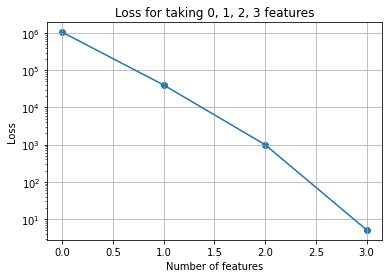

In [82]:
# Write Code here

loss_array = []
########## 0 features included #############
########## In this case, the only option is to take the representation of every vector as the origin #########

data2_0dim = np.zeros(data2.shape)
loss_data2_0dim = np.sum( (data2_0dim - data2)**2 )
print('0 dimension representation')
print('Loss from taking 0 features as the representation :',loss_data2_0dim)
loss_array.append(loss_data2_0dim)

########## 1 feature included #############
########## In this case, we have 4 possible representations ##############
########## x1,x2,x3,x4 each being included separately #############
print('\n\n 1 dimension representation')
loss_1dim = []
for i in range(4) :
    data2_1dim = np.zeros(data2.shape)
    data2_1dim[:,i] = data2[:,i]
    loss_data2_1dim = np.sum( (data2_1dim - data2)**2 )
    loss_1dim.append(loss_data2_1dim)
    print('Loss from taking 1 feature as the representation with x'+str(i+1)+' as the feature',loss_data2_1dim)
loss_array.append(min(loss_1dim))

######### 2 features included #############
######### among the 4 features we include 2 of them in each representation #############
######### Hence, there are 6 six such possibilities ##########
print('\n\n 2 dimension representation')
loss_2dim =[]
for i in range(4) :
    for j in range(i+1,4) :
        data2_2dim = np.zeros(data2.shape)
        data2_2dim[:,i] = data2[:,i]
        data2_2dim[:,j] = data2[:,j]
        loss_data2_2dim = np.sum( (data2_2dim - data2)**2 )
        loss_2dim.append(loss_data2_2dim)
        print('Loss from taking 2 features as the representation with x'+str(i+1)+', x'+str(j+1)+' as the feature',loss_data2_2dim)
loss_array.append(min(loss_2dim))

######### 3 features included #############
######### In this case, we have 4 possibile representations ##############
######### Each of the four columns being dropped once ##############
print('\n\n3 dimension representation')
loss_3dim = []
for i in range(4) :
    data2_3dim = data2.copy()
    data2_3dim[:,i] = 0
    loss_data2_3dim = np.sum( (data2_3dim - data2)**2 )
    loss_3dim.append(loss_data2_3dim)
    print('Loss from taking 3 features as the representation with x'+str(i+1)+' dropped as the feature',loss_data2_3dim)
loss_array.append(min(loss_3dim))   

plt.semilogy([0,1,2,3],loss_array)
plt.scatter([0,1,2,3],loss_array)
plt.grid()
plt.title('Loss for taking 0, 1, 2, 3 features')
plt.xlabel('Number of features')
plt.ylabel('Loss')
plt.show()

From the losses above, we can see that when taking one dimension alone, the loss is lowest for x3. Thereby indicating the x3 is the most significant feature followed by x2 followed by x1 followed by x4.

hence the order of the columns in terms of significance is [2, 1, 0, 3]

**(2d) Compute the covariance matrix of the data. Give your observations between the values in covariance matrix and feature importance obtained in (2c).**

In [83]:
# Write code here
mean_data2 = np.sum( data2 , axis = 0 ).reshape(1,-1)
mean_norm_data2 = data2 - mean_data2
cov_data2 = np.dot( mean_norm_data2.T , mean_norm_data2 )
print('The covariance matrix for data2 is as given below')
print(cov_data2)

The covariance matrix for data2 is as given below
[[ 4.49593978e+06 -4.85609100e+06 -1.55754099e+08 -2.82461162e+05]
 [-4.85609100e+06  5.28526284e+06  1.68265815e+08  3.05146847e+05]
 [-1.55754099e+08  1.68265815e+08  5.39801492e+09  9.78768073e+06]
 [-2.82461162e+05  3.05146847e+05  9.78768073e+06  1.77552230e+04]]


From the above covariance matrix, we can see that the column 2 has the highest variance followed by column 1, column 0 and column 3. This is in accordance with the most significant feature order obtained in (2c) which was [2, 1, 0, 3].

**(3a) Load the data file 'data3.csv' and visualize the data.**

**(3b) Compute the covariance matrix $C$ of data**

In [84]:
# Write code here

data3 = np.loadtxt('data3.csv',delimiter=',')
mean_data3 = np.sum( data3 , axis = 0 ).reshape(1,-1)
mean_norm_data3 = data3 - mean_data3
cov_data3 = np.dot( mean_norm_data3.T , mean_norm_data3 )
print('The covariance matrix for data3 is as given below')
print(cov_data3)

The covariance matrix for data3 is as given below
[[3905.77119557 3974.59648733]
 [3974.59648733 4045.48762769]]


**(3c) Apply PCA to transform data by retaining only 1 PC. Now, visualize the data points in transformed 1-dimensional space**

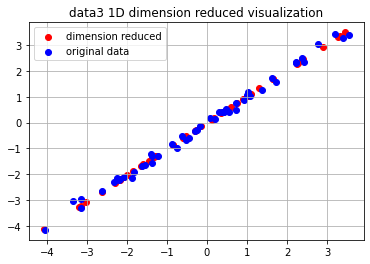

In [92]:
# Write code here

###### caluculate the eigen values of the covariance matrix and pick the eigen vector corresponding to highest 
###### eigen value. Then, in order to obtain the 1D representation multiply data3 matrix and the eigen vector
eigen_values, eigen_vectors = np.linalg.eig(cov_data3)
dim_reduced_eigen_vec = eigen_vectors[:,np.argmax(eigen_values)].reshape(-1,1)
dim_reduced_data = np.dot(data3 , dim_reduced_eigen_vec)

##### In order to visulaize it, we can project the 1D data onto the eigen vector and we can compare it to the original
##### data.
data3_2d_transformed = np.dot(dim_reduced_data,dim_reduced_eigen_vec.T)

plt.scatter(data3_2d_transformed[:,0],data3_2d_transformed[:,1],c='r',label='dimension reduced')
plt.scatter(data3[:,0],data3[:,1],c='b',label='original data')
plt.legend()
plt.grid()
plt.title('data3 1D dimension reduced visualization')
plt.show()

**(3d) Compute the representational loss (with respect to the original data).**

**(3e) Compare the above representation loss with the loss your would incur if you attempted a one-dimensional representation without any transformation. Comment on it.**


In [96]:
#Write code here
loss_2d_pca = np.sum( (data3 - data3_2d_transformed)**2 )
print('Loss for 1D representation on performing PCA :',loss_2d_pca)

###### Here, we are choosing the dimension 1 as the variance in the covariance matrix for dimension 1 is greater
data3_1d_x2 = np.zeros(data3.shape)
data3_1d_x2[:,1] = data3[:,1]

loss_2d_data3_x2 = np.sum( (data3 - data3_1d_x2)**2 )
print('Loss for 1D representation on excluding 1st column of data :',loss_2d_data3_x2)

Loss for 1D representation on performing PCA : 0.4187353468072907
Loss for 1D representation on excluding 1st column of data : 177.66749559601547


Here, we can see that when we try to use one dimensional representation without any transformation, the loss can be very high. Whereas when reduced to 1D using PCA, the dimension used is along the direction in which the data has the maximum variance. Hence the error is comparitively low. 

Also, when reducing to one dimension without using transformation, we are constrained to project the data either on x or y axis whereas when using transformation, we can project the data points onto any line passing through origin thereby enabling us select the direction of maximum variance of the data.

### Application of PCA on real dataset

**(4a) Load the human face data set from sklearn (fetch_lfw_people).**

In [97]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

**(4b) Apply PCA on the faces data (sklearn can be used). Take the top 150 features from PCA. Reconstruct the images with the these 150 features and visualise them. Give your observations.**

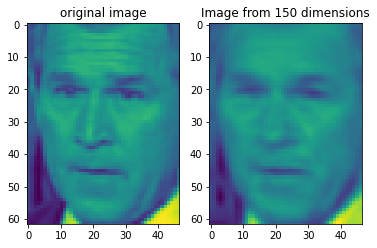

In [98]:
# Write your code here
from sklearn.decomposition import PCA

pca = PCA(n_components = 150)
pca.fit(faces['data'])

faces_dim_reduced = pca.transform(faces['data'])
faces_inverse = pca.inverse_transform(faces_dim_reduced)

plt.figure(1)
plt.subplot(1,2,1)
plt.imshow(faces['data'][1,:].reshape(62,47))
plt.title('original image')
plt.subplot(1,2,2)
plt.imshow(faces_inverse[1,:].reshape(62,47))
plt.title('Image from 150 dimensions')
plt.show()

From the images visualized above, we can see that when we reduce the dimensionality of the image to 150 and reproduce it, there is blurring in the image and some of the imformation in the image is lost. 

However, it is also notable that although we reduce the dimensionality to about one tenth of the original image, the reproduced image somewhat resembles it thereby showing the fact that a mojority of the dimensions have very small impact on the appearance of the image thereby validating dimensionality reduction.

### 5) Cross validation to select parameters for Ridge Regression 

$$\hat{\theta} = argmin_{\theta}((y - X\theta)^\top(y - X\theta) + \lambda \theta^\top \theta)$$


Perform ridge rigression using gradient descent on the data 4 provided. (You can use sklearn)

Try to fit the data with polynomial of degree 3 and 

- For $\lambda$ choose from = [10,100,1000]
- choose learning rate (here it is $\alpha$)= [ 0.01,0.001,0.0001]
- max_iters = 1000

Choose the best combination of $\lambda$ and $\alpha$ using 5-fold cross validation on the dataset provided and report the same.


In [22]:
# Write your code here
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDRegressor

data4 = np.loadtxt('data_X.txt')
X = data4[:,:-1]
y = data4[:,-1]

In [26]:
lamda_list = [10,100,1000]
lr_list = [0.01,0.001,0.0001]
np.random.seed(42)

loss = np.zeros((3,3))
for i in range(3) :
    for j in range(3) :
        regressor = SGDRegressor(penalty='l2',learning_rate='constant',eta0 = lr_list[j] , alpha = lamda_list[i],max_iter = 1000)
        cross_validation = cross_validate(regressor , X , y ,cv = 5,scoring = 'neg_mean_squared_error')
        mean_squared_error = -np.mean(cross_validation['test_score'])
        loss[i,j] = mean_squared_error

arg_opt_regressor_param = np.where(loss == np.amin(loss))
print('The optimal value of lambda is :',lamda_list[arg_opt_regressor_param[0][0]])
print('The optimal value of learning rate is :',lr_list[arg_opt_regressor_param[1][0]])

The optimal value of lambda is : 10
The optimal value of learning rate is : 0.0001


By varying the random seed, we observe that the value of lambda changes. However, the value of the value of the learning rate remains 0.0001 always.